## Name- Uma Mandhyan

## Project: Predicting Heart Disease with Classification Machine Learning Algorithms

Table of Contents
1. Introduction:

    Goal
    
    Attributes Information
    

2. Data Wrangling


3. Exploratory Data Analysis:
    
    Correlations
    

4. Machine Learning + Predictive Analytics:

    Prepare Data for Modeling
    
    Modeling/Training
    
    Making the Confusion Matrix
    
    Feature Importance
    
    Prediction with Example    

5. Conclusion

Goal:
-To predict whether a patient has Heart Disease or not. This is a binary outcome. 
1 means patient has Heart Disease  
0 means patient is Normal 


## Attribute Information

1. Age: Patients Age in years (Numeric)
2. Sex: Gender (Male : 1; Female : 0) (Nominal)
3. cp: Type of chest pain experienced by patient. This term categorized into 4 category.
0 typical angina, 1 atypical angina, 2 non- anginal pain, 3 asymptomatic (Nominal)
4. trestbps: patient&#39;s level of blood pressure at resting mode in mm/HG (Numerical)
5. chol: Serum cholesterol in mg/dl (Numeric)
6. fbs: Blood sugar levels on fasting &gt; 120 mg/dl represents as 1 in case of true and 0 as
false (Nominal)
7. restecg: Result of electrocardiogram while at rest are represented in 3 distinct values
0 : Normal 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or
depression of &gt;
0.05 mV) 2: showing probable or definite left ventricular hypertrophyby Estes&#39; criteria
(Nominal)
8. thalach: Maximum heart rate achieved (Numeric)
9. exang: Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. oldpeak: Exercise induced ST-depression in relative with the state of rest (Numeric)
11. slope: ST segment measured in terms of slope during peak exercise
0: up sloping; 1: flat; 2: down sloping(Nominal)
12. ca: The number of major vessels (0–3)(nominal)
13. thal: A blood disorder called thalassemia
0: NULL 1: normal blood flow 2: fixed defect (no blood flow in some part of the heart) 3:
reversible defect (a blood flow is observed but it is not normal(nominal)

## Output Variable(desired target):


y = target variable which we have to predict 1 means patient issuffering from heart disease and 0 means patient is normal.

In [141]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

In [142]:
data = pd.read_csv("Dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.30,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.50,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.60,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.50,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.40,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.20,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.40,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.20,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.00,1,1,1,1


In [143]:
# checking the unique values

data.nunique(axis=0)

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

In [144]:
#summarizes the count, mean, standard deviation, min, max for numeric variables

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,2.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,0.60,0.66,1.83,0.46
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,0.93,0.96,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,2.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,0.00,0.00,1.00,0.00
50%,56.00,1.00,2.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,1.00,0.00
75%,61.00,1.00,3.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,1.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,3.00,3.00,1.00


In [145]:
#Checking the missing values

data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**No missing values**

In [146]:
data['target'].value_counts()

0    164
1    139
Name: target, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='target', ylabel='count'>

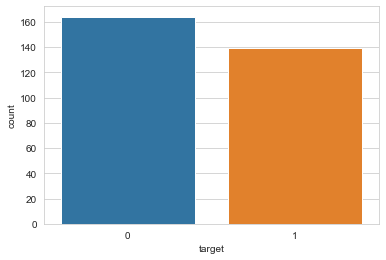

In [147]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=data)

<AxesSubplot:xlabel='target', ylabel='age'>

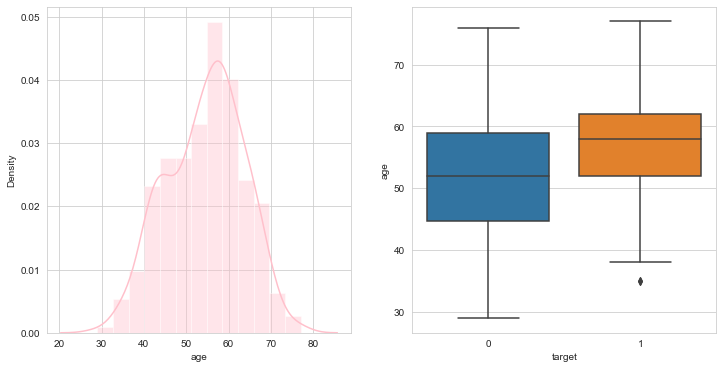

In [148]:
plt.subplots(12,figsize=(12,6))
plt.subplot(121)
sns.distplot(data['age'],color='pink')
plt.subplot(122)
sns.boxplot(x=data['target'],y=data['age'])

If we look at the age distribution, a huge chunk of people are actually over 50. Moreover looking at the boxplot we realise that younger people are less prone to heart disease 

<AxesSubplot:xlabel='sex'>

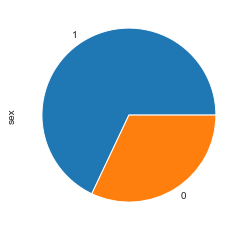

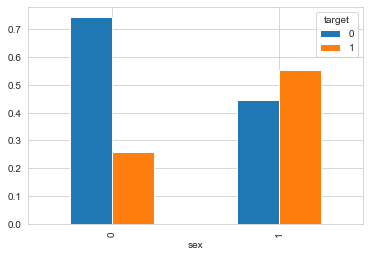

In [149]:
data['sex'].value_counts().plot(kind='pie')

pd.crosstab(data.sex,data.target,normalize='index').plot(kind='bar')

As can be seen from the above diagram, female are more prone to heart disease as compared to women. 

<AxesSubplot:xlabel='cp'>

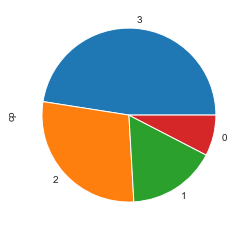

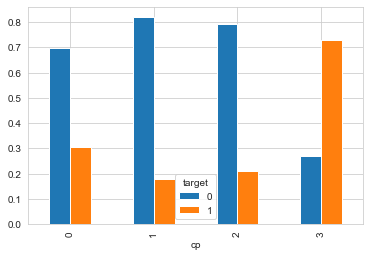

In [150]:
data['cp'].value_counts().plot(kind='pie')

pd.crosstab(data.cp,data.target,normalize='index').plot(kind='bar')

<AxesSubplot:xlabel='fbs', ylabel='count'>

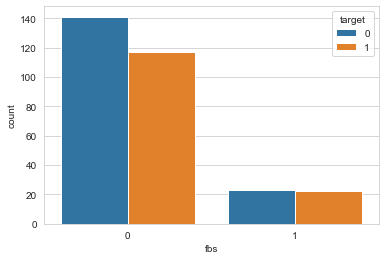

In [151]:
sns.countplot(x=data['fbs'],hue=data.target)

<AxesSubplot:xlabel='restecg'>

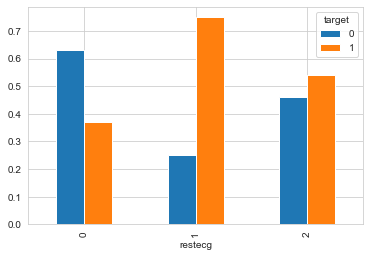

In [152]:
pd.crosstab(data.restecg,data.target,normalize='index').plot(kind='bar')

**Correlations**

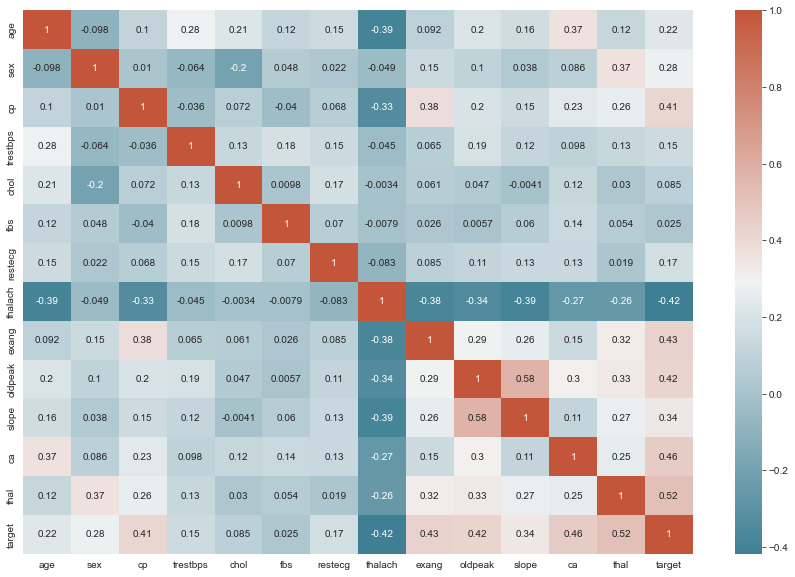

In [153]:
#Checking correlation between all variables

corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

**We can see that there is positive correlation between chest pain(cp) and target(our predictor), exercise(exang) and target
oldpeak and target, ca and target and the highest thal and target. This make sense, the greater 
amount of chest pain results in  a greater chance of having heart disease. In addition, we can see a negative correlation between 
thalach and target**

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

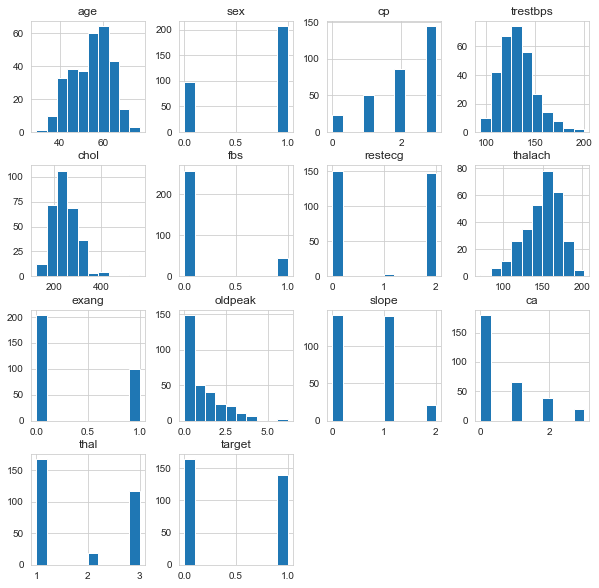

In [189]:
data.hist(figsize=(10, 10))

## Machine Learning + Predictive Analytics

## Prepare Data for Modeling

In [155]:
# Splitting the data into train and test
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)  

Standardizing the data will transform the data so that its distribution will have a mean of 0 and a standard deviation of 1.

In [157]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Modeling/Training

We will now Train various Classification Models on the Training set & see which yields the highest accuracy. We will compare the accuracy of Logistic Regression, K-NN, SVM, Decision Trees and Random Forest

## Model1- Logistic Regression

In [158]:
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(random_state=1) # get instance of model
model1.fit(x_train, y_train) # Train/Fit model 

y_pred1 = model1.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred1)) # output accuracy

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.81      0.81      0.81        27

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Model-2 SVC(Support Vector Classifier)

In [159]:
from sklearn.metrics import classification_report 
from sklearn.svm import SVC

model2 = SVC(random_state=1) # get instance of model
model2.fit(x_train, y_train) # Train/Fit model 

y_pred2 = model2.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred2)) # output accuracy

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.84      0.78      0.81        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Model-3 Decision Tree

In [160]:
from sklearn.metrics import classification_report 
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier(random_state=1) # get instance of model
model3.fit(x_train, y_train) # Train/Fit model 

y_pred3 = model3.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred3)) # output accuracy

              precision    recall  f1-score   support

           0       0.81      0.74      0.77        34
           1       0.70      0.78      0.74        27

    accuracy                           0.75        61
   macro avg       0.75      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



## Model-4 Random Forest

In [161]:
from sklearn.metrics import classification_report 
from sklearn.ensemble import RandomForestClassifier

model4 = RandomForestClassifier(random_state=1)# get instance of model
model4.fit(x_train, y_train) # Train/Fit model 

y_pred4 = model4.predict(x_test) # get y predictions
print(classification_report(y_test, y_pred4)) # output accuracy

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        34
           1       0.84      0.78      0.81        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Model-5 Adaboost

In [162]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
abc.fit(x_train,y_train)
pred5 = abc.predict(x_test)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        34
           1       0.87      0.74      0.80        27

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



**Hyperparameter Tuning**

In [163]:
##Logistic Regression
param_grid = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [164]:
lr_model = LogisticRegression(random_state=42)

In [165]:
grid_search = GridSearchCV(lr_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.81      0.78      0.79        27

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [166]:
print('Best hyperparameters: {}'.format(grid_search.best_params_))

Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [167]:
## SVC
param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto']}

In [168]:
svc_model = SVC()

In [169]:
grid_search = GridSearchCV(svc_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.81      0.78      0.79        27

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [170]:
param_grid = {'n_estimators': [100, 500,1000],
              'max_depth': [10, 50, None],
              'max_features': ['auto', 'sqrt', 'log2']}

In [171]:
## Random forest
rf_model = RandomForestClassifier(random_state=42)

In [172]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        34
           1       0.88      0.78      0.82        27

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61



In [173]:
print('Best hyperparameters: {}'.format(grid_search.best_params_))

Best hyperparameters: {'max_depth': 50, 'max_features': 'auto', 'n_estimators': 500}


In [174]:
## Adaboost
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0, 2.0]}

In [175]:
adaboost_model = AdaBoostClassifier()

In [176]:
grid_search = GridSearchCV(adaboost_model, param_grid=param_grid, cv=5)

In [177]:
grid_search.fit(x_train, y_train)
y_pred = grid_search.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.81      0.78      0.79        27

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [178]:
print('Best hyperparameters: {}'.format(grid_search.best_params_))

Best hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}


Applied hyperparameter tuning on all the models but it doesn't showing much difference 

## Making the Confusion Matrix

In [179]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred4)
print(cm)
accuracy_score(y_test, y_pred4)

[[30  4]
 [ 6 21]]


0.8360655737704918

30 is the amount of True Positives in our data, while 21 is the amount of True Negatives.

4 & 6 are the number of errors.

There are 4 type 1 error (False Positive)- Model predicted positive and it’s false.

There are 6 type 2 error (False Negative)- Model predicted negative and it’s false.

Hence if we can calculate the accuracy # Correct Predicted/ # Total. In other words, where TP, FN, FP and TN represent the number of true positives, false negatives, false positives and true negatives.

(TP + TN)/(TP + TN + FP + FN). (30+21)/(30+21+4+6) = 0.836 = 84% accuracy



## Feature Importance

Feature Importance provides a score that indicates how helpful each feature was in our model.

The higher the Feature Score, the more that feature is used to make key decisions & thus the more important it is.

In [180]:
# get importance
importance = model4.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.09470
Feature: 1, Score: 0.04125
Feature: 2, Score: 0.12060
Feature: 3, Score: 0.06263
Feature: 4, Score: 0.07485
Feature: 5, Score: 0.00961
Feature: 6, Score: 0.02022
Feature: 7, Score: 0.11517
Feature: 8, Score: 0.07713
Feature: 9, Score: 0.12031
Feature: 10, Score: 0.04537
Feature: 11, Score: 0.09856
Feature: 12, Score: 0.11960


<AxesSubplot:>

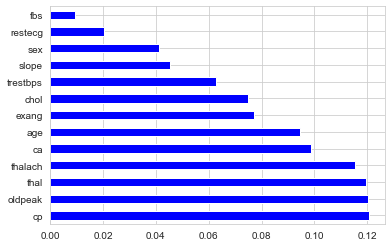

In [181]:
index= data.columns[:-1]
importance = pd.Series(model4.feature_importances_, index=index)
importance.nlargest(13).plot(kind='barh', colormap='winter')

From the Feature Importance graph above, we can conclude that the top 4 significant features were chest pain type (cp)
ST depression induced by exercise relative to rest (oldpeak),blood disorder(thal) and maximum heart rate achieved (thalach)

## Prediction with Example

Scenario: A patient develops cardiac symptoms & I input his vitals into the Machine Learning Algorithm.

He is a 20 year old male, with a chest pain value of 2 (atypical angina), with resting blood pressure of 110.

In addition he has a serum cholestoral of 230 mg/dl.

He is fasting blood sugar > 120 mg/dl.

He has a resting electrocardiographic result of 1.

The patients maximum heart rate achieved is 140.

Also, he was exercise induced angina.

His ST depression induced by exercise relative to rest value was 2.2.

The slope of the peak exercise ST segment is flat,in addition his maximum heart rate achieved is a reversable defect.

Based on this information, we can classify this patient has Heart Disease or not?

In [182]:
print(model4.predict(sc.transform([[20,1,2,110,230,1,1,140,1,2.2,2,0,2]])))

[0]


Yes! Our machine learning algorithm has classified this patient with Heart Disease. Now we can properly diagnose him, & get him the help he needs to recover. By diagnosing him early, we may prevent worse symtoms from arising later.

Predicting the Test set results:

First value represents our predicted value, Second value represents our actual value.

If the values match, then we predicted correctly. We can see that almost results are very accurate!

In [183]:
y_pred = model4.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]]


**Conclusion**

Random Forest, Adaboost & Logistic algorithm yields the highest accuracy 84% along with the good F1 score

Out of the 13 features I examined, the top 4 significant features which has a major role in predicting the diagnosis were chest pain type (cp),ST depression induced by exercise relative to rest (oldpeak),blood disorder(thal) and maximum heart rate achieved (thalach)
